# Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load DatA Set

In [2]:
def load_data(file_path):
    """Function to load movie data from a file"""
    data = pd.read_csv(file_path, encoding='latin-1') 
    print(data.head())
    return data

# Columns Clasification 

In [3]:
def classify_columns(data_frame):
    """Function to classify columns as categorical or numeric"""
    categorical_columns = data_frame.select_dtypes(include=['object']).columns
    numeric_columns = data_frame.select_dtypes(include=['int64', 'float64']).columns
    
    return list(categorical_columns), list(numeric_columns)

# Pre Processing 

In [14]:

from sklearn.preprocessing import LabelEncoder

def preprocess_categorical_data(data_frame, column_name):
    """Function to preprocess categorical data"""
    label_encoder = LabelEncoder()
    data_frame[column_name] = label_encoder.fit_transform(data_frame[column_name])
    
    return data_frame

def preprocess_numeric_data(data_frame, column_name):
    """Function to preprocess numeric data"""
    imputer = SimpleImputer(strategy='median')
    data_frame[column_name] = imputer.fit_transform(data_frame[[column_name]])
    scaler = StandardScaler()
    data_frame[column_name] = scaler.fit_transform(data_frame[[column_name]])

    return data_frame

# Remove Outliers

In [5]:
def remove_numeric_outliers(df, multiplier=1.5, inplace=False):
    """Function to remove outliers from numeric columns"""
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - multiplier * iqr
        upper_bound = q3 + multiplier * iqr
        if inplace:
            df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)
        else:
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    if not inplace:
        return df


# Feature Selection 

In [6]:
def feature_selection(dataset, target_variable, k=5):
    if target_variable not in dataset.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in the dataset columns.")
    X = dataset.drop(target_variable, axis=1)
    y = dataset[target_variable]
    k_best = SelectKBest(score_func=f_regression, k=k)
    X_selected = k_best.fit_transform(X, y)
    selected_feature_indices = k_best.get_support(indices=True)
    selected_columns = X.columns[selected_feature_indices]
    if target_variable not in selected_columns:
        selected_columns = [target_variable] + selected_columns.tolist()

    selected_dataset = dataset[selected_columns]

    return selected_dataset, dataset[target_variable]

# Model Selection 

In [7]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test, target_variable):
    if target_variable != 'rating':
        raise ValueError("Invalid target variable name. Expected 'rating' for regression.")
    
    # Initialize and fit regression models
    linear_regression_model = LinearRegression()
    ridge_regression_model = Ridge(random_state=42)
    gradient_boosting_model = GradientBoostingRegressor(random_state=42)
    
    linear_regression_model.fit(X_train, y_train)
    ridge_regression_model.fit(X_train, y_train)
    gradient_boosting_model.fit(X_train, y_train)
    
    # Evaluate regression models
    linear_regression_predictions = linear_regression_model.predict(X_test)
    ridge_regression_predictions = ridge_regression_model.predict(X_test)
    gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
    
    linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
    ridge_regression_mse = mean_squared_error(y_test, ridge_regression_predictions)
    gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
    
    print("Linear Regression Mean Squared Error:", linear_regression_mse)
    print("Ridge Regression Mean Squared Error:", ridge_regression_mse)
    print("Gradient Boosting Regression Mean Squared Error:", gradient_boosting_mse)
    
    # Output the best model
    best_model = min([
        ('Linear Regression', linear_regression_mse),
        ('Ridge Regression', ridge_regression_mse),
        ('Gradient Boosting Regression', gradient_boosting_mse)
    ], key=lambda x: x[1])

    print(f"\nBest Model: {best_model[0]} with Mean Squared Error: {best_model[1]}")

    return best_model[0], best_model[1]

# Train Best MOdel 

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_best_model(X_train, y_train, X_test, y_test, model, eval_metric='mse'):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    if eval_metric == 'mse':
        metric_value = mean_squared_error(y_test, predictions)
    elif eval_metric == 'mae':
        metric_value = mean_absolute_error(y_test, predictions)
    elif eval_metric == 'r2':
        metric_value = r2_score(y_test, predictions)
    else:
        raise ValueError(f"Invalid evaluation metric: {eval_metric}. Supported metrics are 'mse', 'mae', and 'r2'.")

    # Print evaluation metric
    print(f"Model: {type(model).__name__} - {eval_metric.capitalize()}: {metric_value}")

    return metric_value




# Pl0ts 

In [9]:
def plot_box_plots(data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data)
    plt.title("Box Plot For Checking   Outliers")
    plt.xticks(rotation=45)
    plt.show()

def plot_histograms(X):
    X.hist()
    plt.suptitle('Histograms of Features')
    plt.show()

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

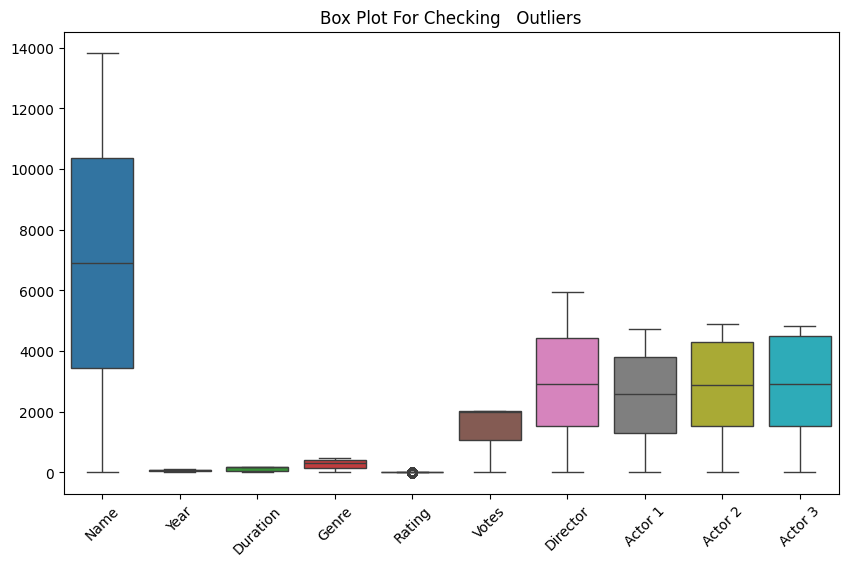


Categorical Columns: ['Name', 'Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

Numeric Columns: ['Rating']

 plot to check the outliers
 


 Data Set  <bound method NDFrame.head of         Name  Year  Duration  Genre    Rating  Votes  Director  Actor 1  \
0          0   102       182    299  0.081646   2034      1926     2250   
1          1    98         9    299  1.091258   1849      1548     3280   
2          2   100       172    351  0.081646   2034      5123     3713   
3          3    98        10    228 -1.533732   1169      3319     2917   
4          7    89         5    299  0.081646   2034       385     3112   
...      ...   ...       ...    ...       ...    ...       ...      ...   
15504  13832    67       182      0 -1.331810    368      2690     2586   
15505  13834    78        29     40 -1.432771   1687      2499      227   
15506  13835    84       182      0  0.081646   2034      2424     3609   
15507  13836    67       182     

In [17]:
def main():
    file_path = "IMDb Movies India.csv"  
    data = load_data(file_path)
   # data = data.sample(frac=0.1, random_state=42)
    categorical_columns, numeric_columns = classify_columns(data)
    for column in categorical_columns:
        data = preprocess_categorical_data(data, column)
    for column in numeric_columns:
        data = preprocess_numeric_data(data, column)
    plot_box_plots(data)
    print("\nCategorical Columns:", categorical_columns)
    print("\nNumeric Columns:", numeric_columns)
    print("\n plot to check the outliers\n ")
    print("\n\n Data Set ",data.head)
    try:
        selected_features, target_variable = feature_selection(data, 'Rating', k=5) 
    except ValueError as e:
        print(e)
        return
    X = selected_features.drop('Rating', axis=1)
    y = selected_features['Rating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("\nTraining and Evaluating Linear Regression Model:")
    model = LinearRegression()

    mse = train_best_model(X_train, y_train, X_test, y_test, model, eval_metric='mse')
    mae = train_best_model(X_train, y_train, X_test, y_test, model, eval_metric='mae')

if __name__ == "__main__":
    main()
